In [142]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas_datareader as pdr
import pandas_datareader.data as web
from datetime import datetime

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 7


In [143]:
## Get data 

start = datetime(2015, 9, 1)
end = datetime(2019, 9, 1)
df = web.DataReader('TSLA', 'iex', start, end, api_key=os.getenv("IEX_API_KEY"))

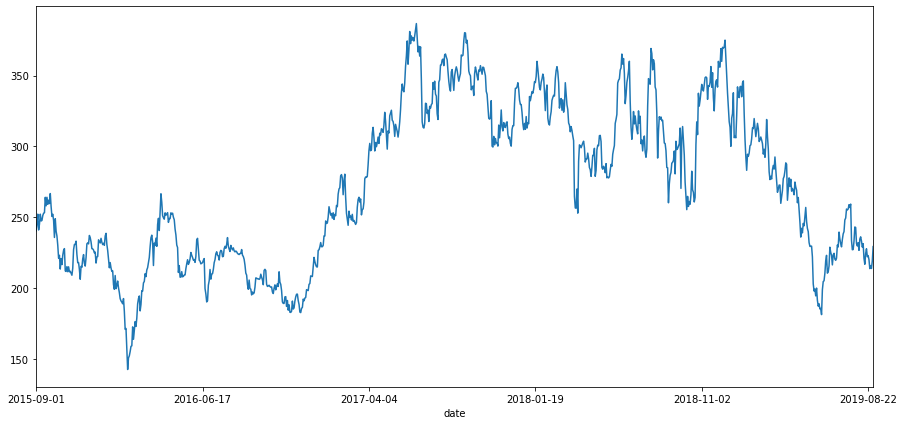

In [144]:
df.open.plot()

a:  [ 1.         -0.93906251]
b:  [0.03046875 0.03046875]


<BarContainer object of 1007 artists>

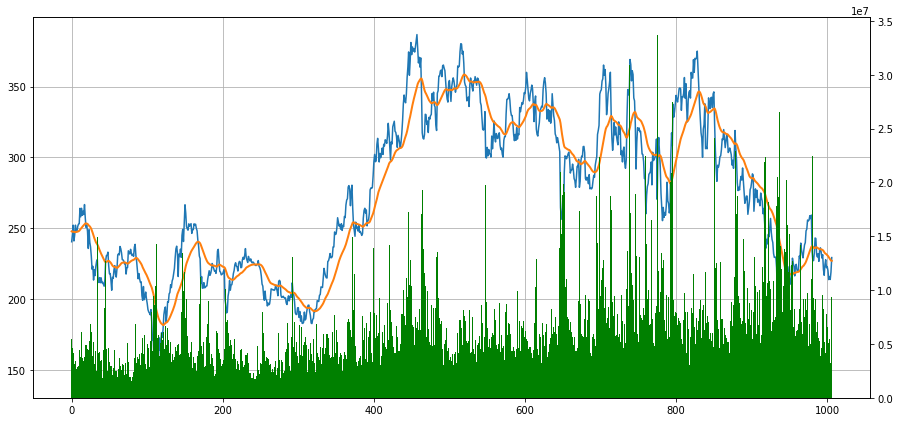

In [145]:
## filter
from scipy import signal

b, a = signal.butter(1, 0.02)
print("a: ", a)
print("b: ", b)

x = df.open.to_numpy()
#x_s = signal.filtfilt(b, a, x)   # xs: smoothed x
zi = signal.lfilter_zi(b, a)
x_s, _ = signal.lfilter(b, a, x, zi=[x[0]]*len(zi))   # xs: smoothed x

plt.plot(x)
plt.plot(x_s, lw=2)
plt.grid()

ax2 = plt.gca().twinx()
ax2.bar(range(len(df.volume.to_numpy())), df.volume.to_numpy(), width=1.1, color='g')

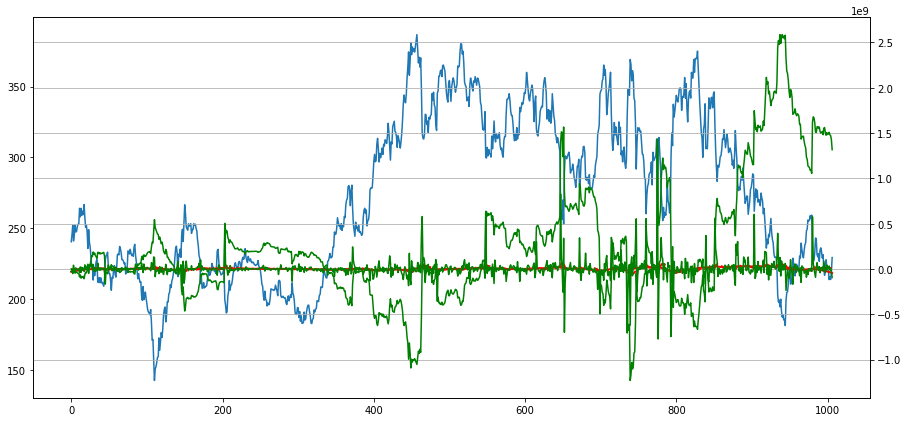

In [147]:
x_1 = np.roll(x, 1); x_1[0] = 2*x[0] - x[1];
dxv = (x_1 - x) * df.volume.to_numpy()
dxv_s = signal.filtfilt(b, a, dxv)
dxv_s_, _ = signal.lfilter(b, a, dxv, zi=[x[0]]*len(zi))  

xs_1 = np.roll(x_s, 1); xs_1[0] = xs[0]# - xs[1];
dxs_vs = (xs_1 - x_s) * signal.filtfilt(b, a, df.volume.to_numpy())

int_dxv = np.zeros(len(dxv))
avg_pts = 200
int_dxv_avg = np.zeros(len(dxv))
for i in range(1, len(dxv)):
    int_dxv[i] = dxv[i] + int_dxv[i - 1]
    for j in range(max(i - avg_pts, 0), i):
        int_dxv_avg[i] += int_dxv[j]
int_dxv_avg /= avg_pts

plt.plot(x)

ax2 = plt.gca().twinx()
ax2.plot(dxv_s, "r", lw=2)
ax2.plot(dxv_s_, "r-.", lw=2)
ax2.plot(dxv, "g")
ax2.plot(int_dxv - 1*int_dxv_avg, "g")
plt.grid()